In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# <center> EC3389 - Week 5 - Machine Learning Basics with Scikit-learn </center>

<b>Announcements</b>

+ HW2Q1, HW2Q4

+ Extra OH for programming beginners: Tomorrow 1h30PM (?)

+ Work in groups today (?)

<b>Today's libraries</b>

Today we will be mainly looking at *Scikit-Learn*, the most popular Python machine learning library.

In [64]:
import sklearn.linear_model as skl
import sklearn.cross_validation as skv

We'll also use the *seaborn* library for data visualization. 

In [11]:
import seaborn as sns
sns.set_style("white") # Makes *all* plots cleaner

If any of the the previous cells raised an error, uncomment and run the next two lines.

In [ ]:
#!pip install seaborn  
#!pip install scikit-learn

[Don't worry about this cell, I'm just arranging the data set we will use today]

In [12]:
from sklearn.datasets import load_boston
boston = load_boston()
boston_data = pd.DataFrame(data = np.hstack([boston.target[:,np.newaxis], boston.data]), 
                    columns = ["price"] + list(boston["feature_names"]))
X = boston_data.ix[:, "DIS"].values[:,np.newaxis]
y = boston_data.ix[:, "NOX"].values[:,np.newaxis]

Note: the Boston data set makes occasional appearances in the textbook

In [14]:
#print(boston.DESCR) 

# Machine learning in one minute

<b>Step 1:</b> *Instantiate* an *object* of the *class* sklearn.linear_model.LinearRegression (Explanation later in the semester)

In [17]:
lr = skl.LinearRegression()

<b>Step 2:</b> Fit the model 

In [18]:
lr.fit(X = X, y = y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<b>Step 3:</b> Predict

In [19]:
yhat = lr.predict(X = 5) # Predict given any point
print("Predicted y: ", yhat)

Predicted y:  [[ 0.50368814]]


<b>Step 4</b>: Done! Go update your résumé.

To use different *supervised learning* algorithms, just change "LinearRegression"!

# Evaluating a model's predictive performance

$$R^2 = 1 - \frac{\text{Residual Sum of Squares}}{\text{Total sum of squares}}  =
1  - \frac{\sum_{i}(y_{i} - \hat{y})^2}{\sum_{i}(y_{i} - \bar{y})^2}$$

<b>Exercise</b>

Write a function that computes the R-squared according to the formula above

In [30]:
def get_rsquared(y, yhat):
    ybar = np.mean(y)
    ssr = np.sum((y-yhat)**2)
    sst = np.sum((y - ybar)**2)
    rsq = 1 - (ssr/sst)
    return rsq


Compute the $R^2$ of the function

In [31]:
yhat = lr.predict(X)
rsq = get_rsquared(y, yhat)
print("R^2: ", rsq)

R^2:  0.591714967093


In [34]:
#or. . . 
lr.score(X,y)

0.59171496709342009

<b>Discussion</b> Is this a "good" $R^2$? Are we done?

<b>Using</b> <font face="Courier">score</font></b>

## Splitting the data

<b>Exercise</b>

+ Split your data set by allocating:

    * 70% of the DIS values to a variable named <font face="Courier">X_train</font>, and their corresponding NOX values to a variable names  <font face="Courier">y_train</font>
    * The remaining 30% of the DIS values to a variable named <font face="Courier">X_test</font>, and their corresponding NOX values to a variable names  <font face="Courier">y_test</font>

* <font color = "navy"><b>[Intermediate]</b></font> Make that a *random* 70%/30% split


* <font color = "navy"><b>[Advanced]</b></font> Write a *function* that, given two arrays <font face="Courier">X</font> and <font face="Courier">y</font>, randomly splits them into <font face="Courier">X_train</font>, <font face="Courier">X_test</font>, <font face="Courier">y_train</font>, <font face="Courier">y_test</font>

In [47]:
lenx = len(X)
leny = len(y)
xtrain = X[0:int(lenx*.7)]
ytrain = y[0:int(leny*.7)]
xtest = X[int(lenx*.7):]
ytest = y[int(leny*.7):]

In [50]:
len(ytrain)

354

Once you have done that, you can test how well your model is doing:

<b> Exercise</b> 

Compute the $R^2$ of the train and test data

In [58]:
lr = skl.LinearRegression()
lr.fit(xtrain, ytrain)  # Fit using *training* data here

rsq_test = lr.score(xtest, ytest)
rsq_train = lr.score(xtrain, ytrain)


print("Rsq_train: ", rsq_train, " Rsq_test: ", rsq_test)

Rsq_train:  0.603155274719  Rsq_test:  0.554417705596


<b>Discussion</b> 

+ What do the relative sizes of <font face="Courier">rsq_train</font> and <font face="Courier">rsq_test</font> tell us about model fit?
 
+ What would have happened had we chosen a different 70% of the data to be our test set? What does that tell you about $R^2$?

<b>Using</b> <font face ="Courier">sklearn.cross_validation.train_test_split</font>

In [60]:
xtrain, xtest, ytrain, ytest = skv.train_test_split(X,y)

# Can we improve our performance?

For models with few regressors, it's good practice to try plotting your *TRAINING* data.

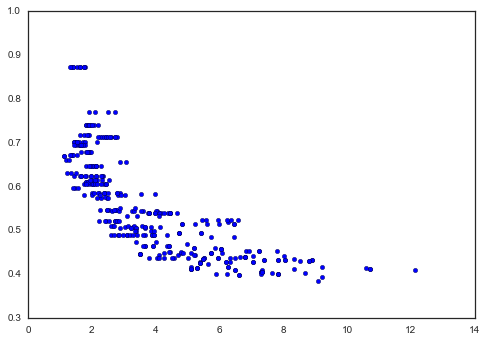

In [55]:
plt.scatter(xtrain, ytrain)

<b>Discussion</b> What are some issues with our specification? (Extra: are Gauss-Markov assumptions satisfied?)

## 1) Look for variable transformations

If we can make our data linear (or, in general, more compliant to the assumptions of our model), the fit may improve.

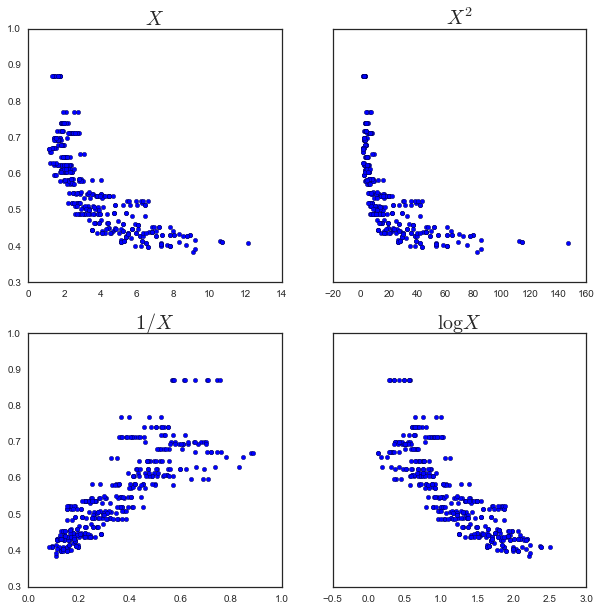

In [56]:
fig, ax = plt.subplots(2, 2, figsize = (10,10),  sharey = True)

ax[0,0].scatter(x = xtrain, y = ytrain)
ax[0,0].set_title("$X$", fontsize = 20)

ax[0,1].scatter(x = xtrain**2, y = ytrain)
ax[0,1].set_title("$X^2$", fontsize = 20)

ax[1,0].scatter(x = 1/xtrain, y = ytrain)
ax[1,0].set_title("$1/X$", fontsize = 20)

ax[1,1].scatter(x = np.log(xtrain), y = ytrain)
ax[1,1].set_title("$\log{X}$", fontsize = 20)

<b>Exercise</b>

+ Create new variables <font face="Courier">X_test_new = g(X_test)</font> and <font face="Courier">X_train_new = g(X_train)</font>, where <font face="Courier">g</font> is any function of your choice.


+ Find the training and test R-squared for this new specification. Is it larger than before transforming it?

## 2) Use a more flexible model

Using <font face="Courier">K-Nearest Neighbors</font>, we get $R^2\approx 0.74$ on the *test* set! 

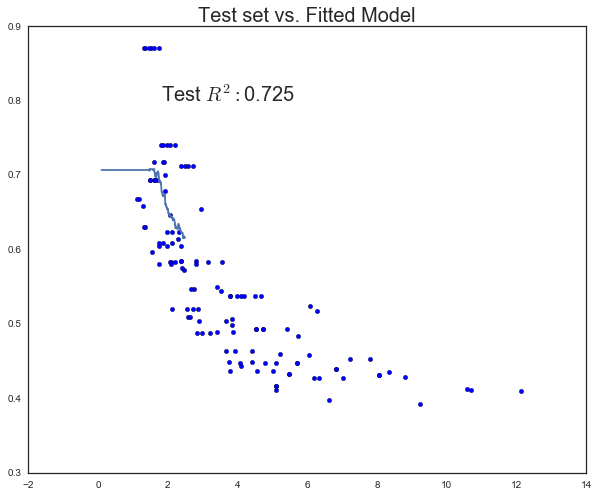

In [68]:
import sklearn.neighbors as skn
knn = skn.KNeighborsRegressor(n_neighbors= 50)
knn.fit(xtrain, ytrain)
rsq = knn.score(xtest, ytest)

X_grid = np.linspace(.1, 2.5, 1000).reshape(-1,1)
y_grid = knn.predict(X_grid)

fig, ax = plt.subplots(1, figsize = (10,8))
ax.plot(X_grid, y_grid)
ax.scatter(xtest, ytest)
ax.text(1.8, .8, "Test $R^2:$" + str(np.round(rsq, 3)), fontsize = 20)
ax.set_title("Test set vs. Fitted Model", fontsize = 20)

# To Think

<font size = 3>
+ Theoretically, given <i>one data set</i>, can we keep improving forever, coming up with increasingly better algorithms? 

+ Could there be an algorithm that is beats all others, given <i>any data set</i>?